In [15]:
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import numpy as np
from PIL import Image

%matplotlib inline


In [16]:
bilibili_mask=np.array(Image.open('./picture_result/bilibili_origin.png'))

In [17]:
def str_list(s:str):
    s=s.strip('"').strip("[").strip("]").strip("'").split("', '")
    return [i.strip() for i in s]

In [57]:
tags=[]
titles=[]
reply=[]
disc=[]
rel_titles=[]
reply_txt=[]
with open('./csv_result/csv_result0.csv','r',encoding='utf-8') as f:
    csv_reader=csv.reader(f)
    for row in csv_reader:
        if row!=[]:
            tags+=str_list(row[2])
            titles.append(row[0])
            reply.append(str_list(row[-1]))
            reply_txt.append(row[-1].replace('[','').replace(']','').replace('"','').replace(',','').replace(' ','').replace('\n','').replace("'",''))
            disc.append(row[3])
            rel_titles.append(str_list(row[4]))

In [63]:
with open('./txt_result/txt_result0.txt','w',encoding='utf-8') as f:
    for i in range(len(titles)):
        f.write("{}\n{}\n".format(titles[i],reply_txt[i][:64]+(64-len(reply_txt[i][:64]))*" "))


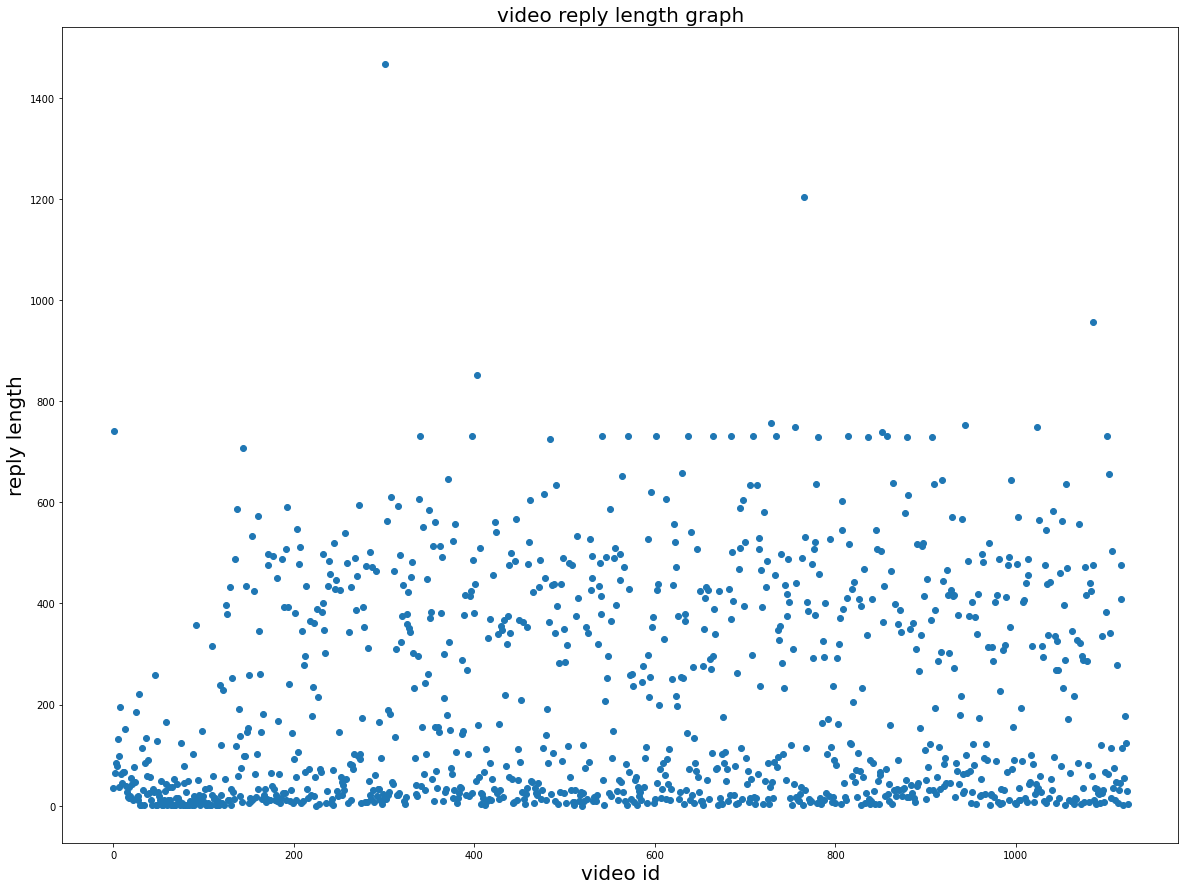

In [56]:
x=[]
for txt in reply_txt:
    x.append(len(txt))

y=[i for i in range(len(reply_txt))]
plt.figure(figsize=(20,15))
plt.scatter(y,x)
plt.xlabel('video id',fontsize=20)
plt.ylabel('reply length',fontsize=20)
plt.title('video reply length graph',fontsize=20)
plt.savefig('./picture_result/reply_length.png')
plt.show()

In [20]:
wordcloud=WordCloud(mask=bilibili_mask, font_path="C:/Windows/Fonts/STFANGSO.ttf",background_color="white",width=3000,height=3000,collocations=False).generate(" ".join(tags))


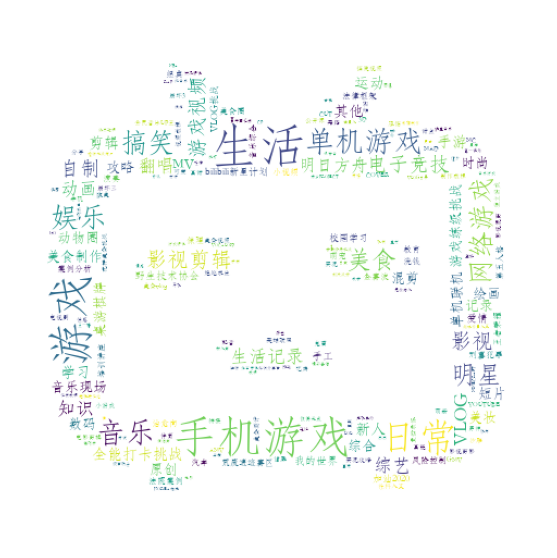

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig('./picture_result/tags_wordcloud.png',dpi=1200)
plt.show()
wordcloud.to_file('./picture_result/tags_wordcloud.png')

In [64]:
#从文件导入停用词表
stpwrdpath = "./stop_words/stop_words.txt"
stpwrd_dic = open(stpwrdpath, 'rb')
stpwrd_content = stpwrd_dic.read()
#将停用词表转换为list  
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()